# LAB_01

### TASK1

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

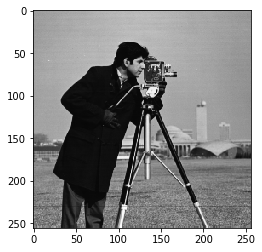

In [98]:
image = cv2.imread('C:\\Users\\Tarmah\\DATA\\cameraman.tif')
plt.imshow(image)
plt.show()

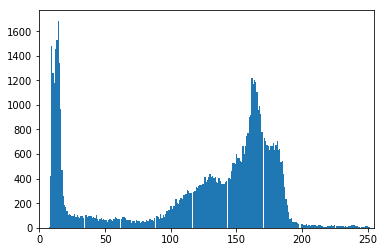

In [99]:
# calculate mean value from RGB channels and flatten to 1D array
vals = image.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

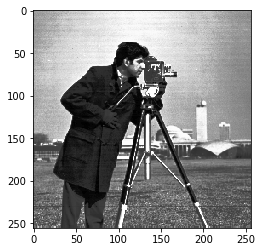

In [100]:
img_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)

plt.imshow(hist_equalization_result)

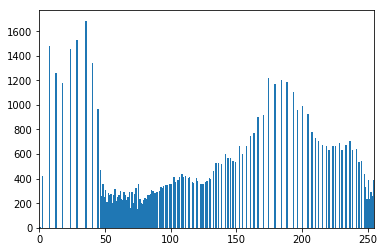

In [101]:
# calculate mean value from RGB channels and flatten to 1D array
vals = hist_equalization_result.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

### TASK2

#### BOX-FILTER

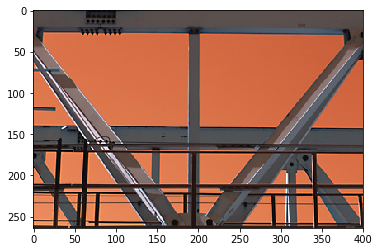

In [102]:
image = cv2.imread('C:\\Users\\Tarmah\\DATA\\gantrycrane.png')
plt.imshow(image)
plt.show()

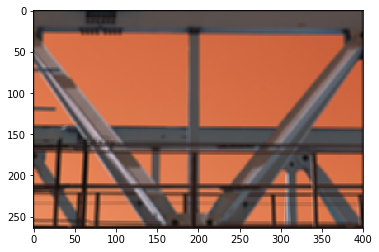

In [103]:
kernel = np.ones((5,5),np.float32)/25 #kernel taking average
dst = cv2.filter2D(image,-1,kernel,borderType=cv2.BORDER_CONSTANT)
plt.imshow(dst)
plt.show()

#### GAUSSIAN

In [104]:
stds = [0,0.25,0.5,1]
gaussians = []

for std in stds:
    gaussians.append(cv2.GaussianBlur(image,(5,5),std))

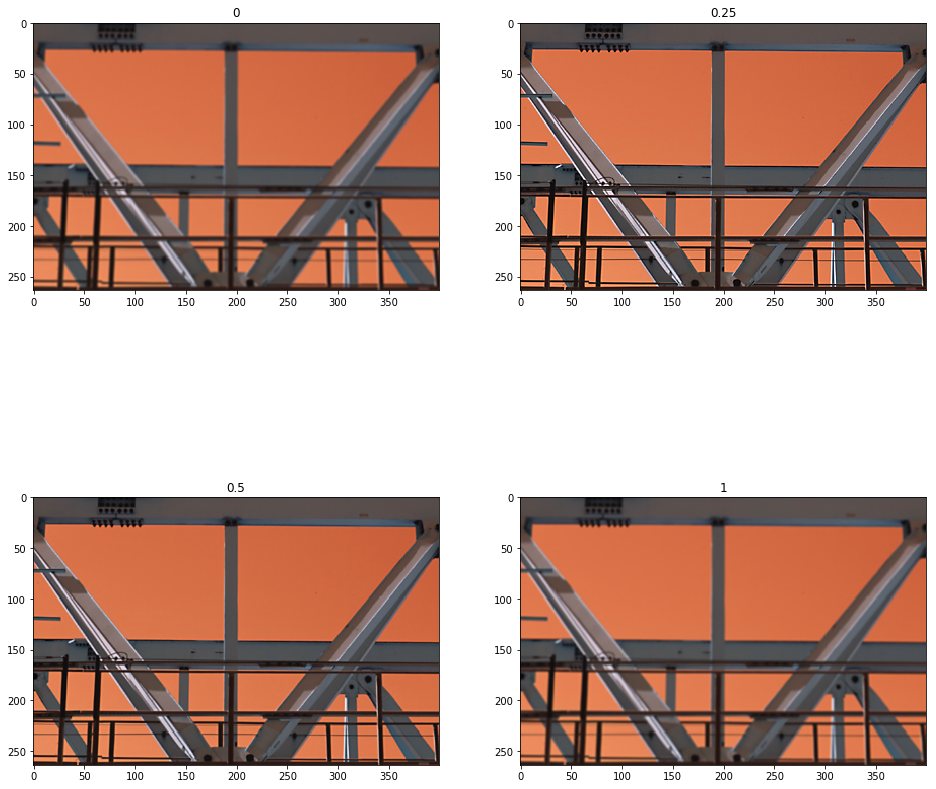

In [105]:
f, axarr = plt.subplots(2,2,figsize=(16,16))

for i,ax in enumerate(axarr.flatten()):
    ax.imshow(gaussians[i])
    ax.set_title(stds[i])
plt.show()

#### GAUSSIAN NOISE

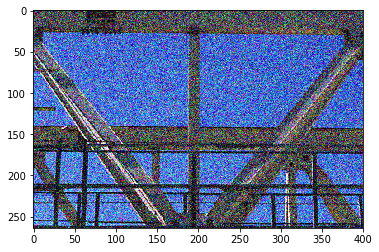

In [106]:
img = cv2.imread('C:\\Users\\Tarmah\\DATA\\gantrycrane.png')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)

plt.imshow(noisy)

#### SALT AND PEPPER

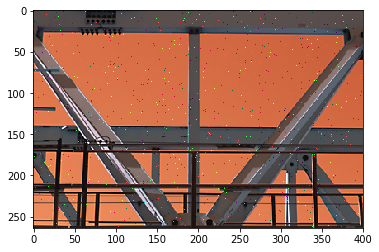

In [107]:
row,col,ch = image.shape
s_vs_p = 0.5
amount = 0.004
out = np.copy(image)

# Salt mode
num_salt = np.ceil(amount * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
out[tuple(coords)] = 255

# Pepper mode
num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))for i in image.shape]
out[tuple(coords)] = 0
plt.imshow(out)

#### MEDIAN FILTER

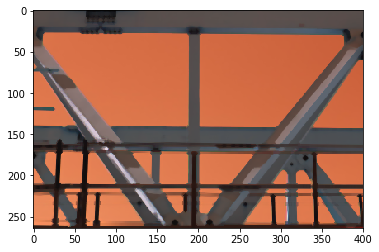

In [108]:
median = cv2.medianBlur(image,5)
plt.imshow(median)

#### CANNY EDGE DETECTION

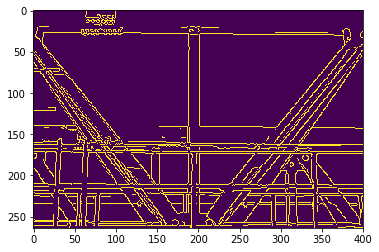

In [109]:
edges = cv2.Canny(image,100,200)
plt.imshow(edges)

#### SOBEL

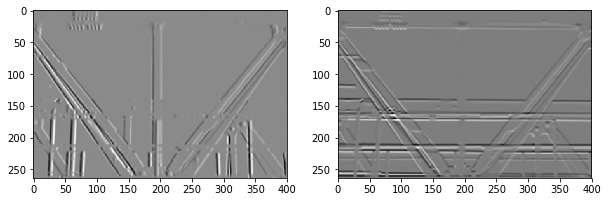

In [110]:
img = cv2.imread('C:\\Users\\Tarmah\\DATA\\gantrycrane.png',0) #convert-to_greyscale

img = cv2.GaussianBlur(img,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y''

f, axarr = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.show()

### TASK3

###### Press ESC to exit from webcam

In [11]:
capture = cv2.VideoCapture(0)
 
while(True):
     
    ret, frame = capture.read()
    
    frame = cv2.Canny(frame,100,200)
    cv2.imshow('video', frame)
     
    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()